## Problem Description

The goal of this analysis is to estimate the parameter \(\lambda\) of a Poisson distribution that models failure times. The analysis involves generating random failure times based on a known \(\lambda\) and then estimating this parameter using maximum likelihood estimation (MLE). The process is repeated for different sample sizes to observe how the estimate of \(\lambda\) converges to the true value as the number of samples increases.

Key components of the problem:
1. **Generate Failure Times**: Using a Poisson distribution with a known parameter \(\lambda\), simulate failure times.
2. **Estimate \(\lambda\)**: Calculate the maximum likelihood estimate of \(\lambda\) from the simulated data.
3. **Analyze the Accuracy**: Assess how the estimated \(\lambda\) varies with the number of samples and calculate the relative error compared to the true \(\lambda\).
4. **Visualize the Results**: Create plots to show the distribution of failure times, the log-likelihood function, and how the estimate of \(\lambda\) and its relative error depend on the sample size.


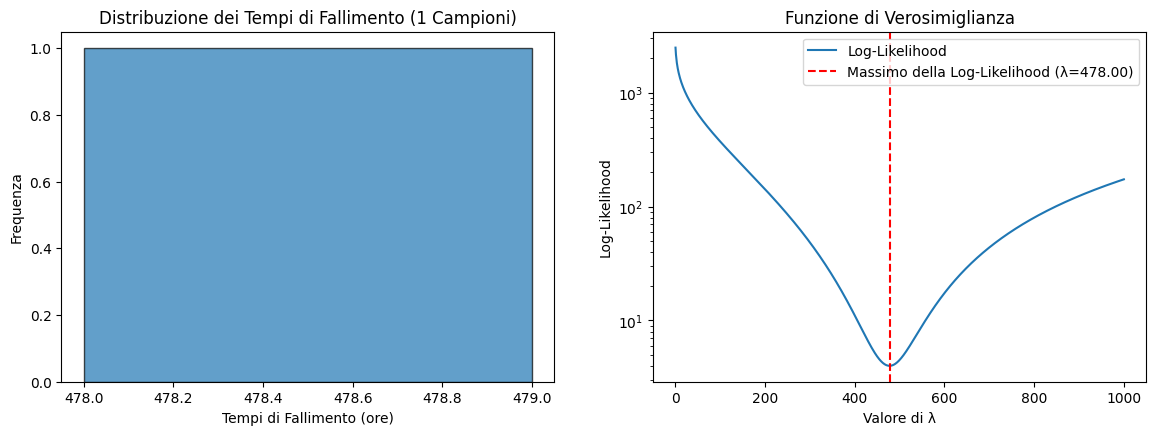

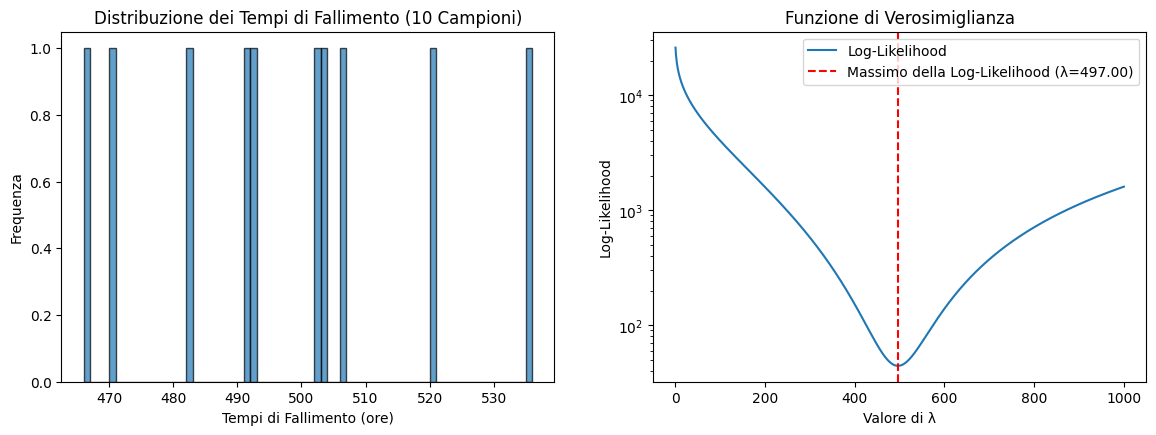

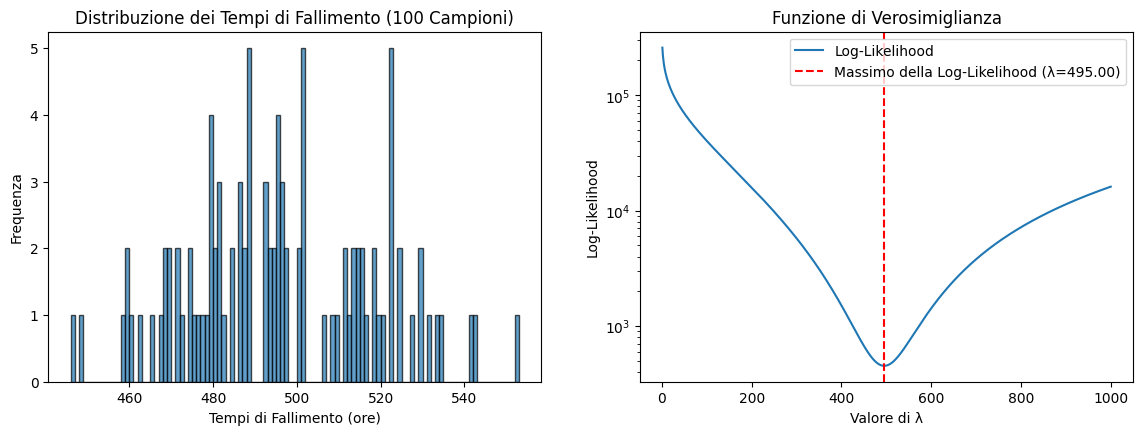

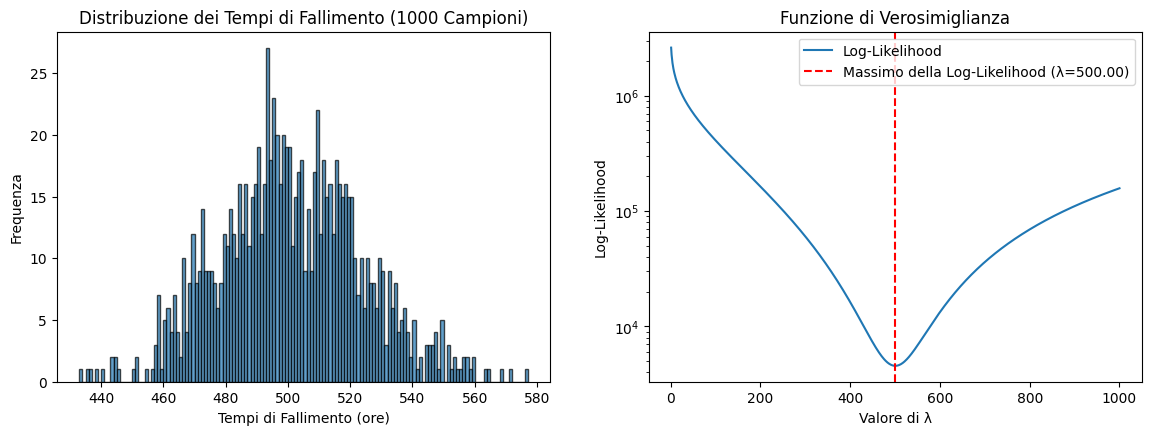

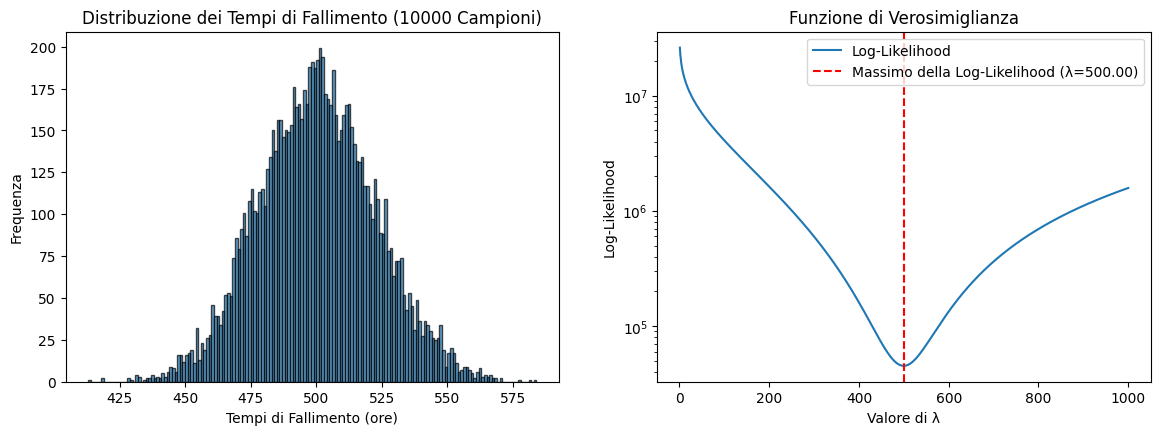

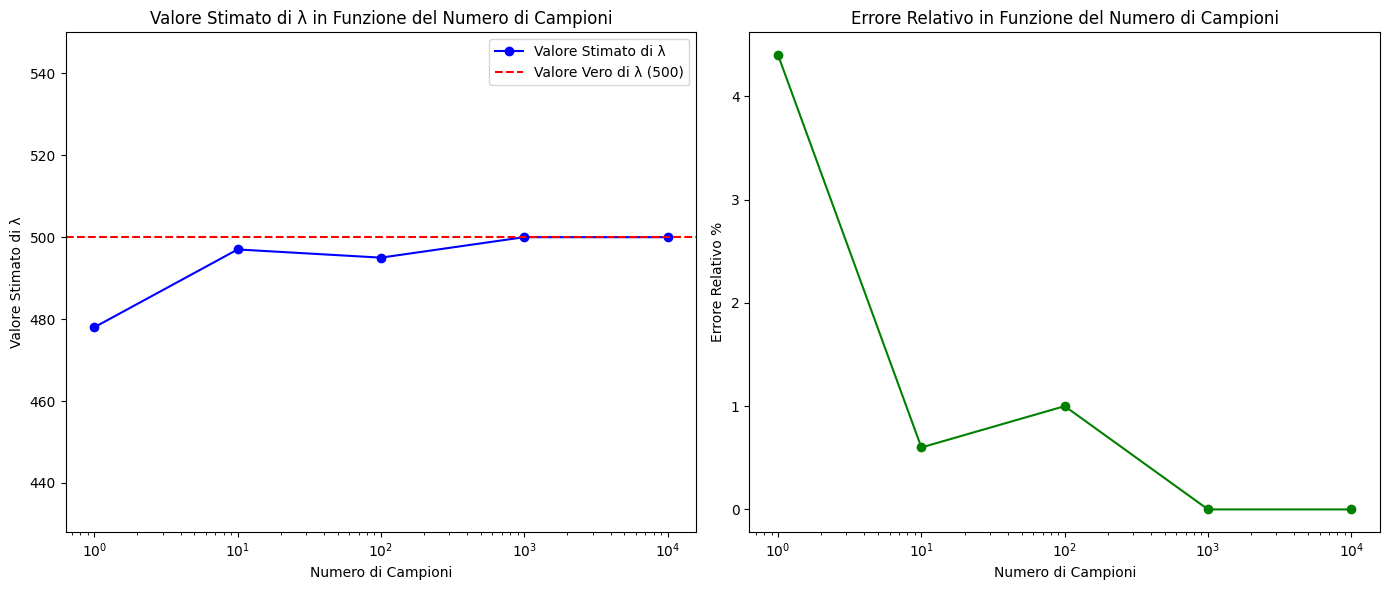

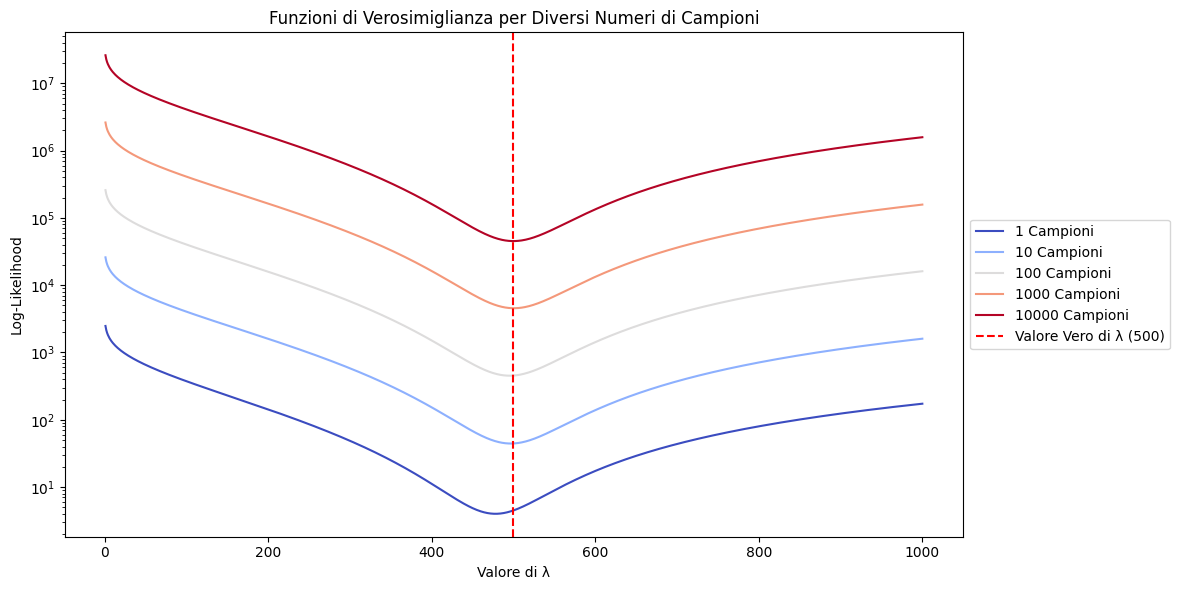

In [52]:
import matplotlib.pyplot as plt
import math
import random
import matplotlib.colors as mcolors
import numpy as np

def analyze_failure_times(num_samples):
    # Funzione per generare i tempi di fallimento usando la distribuzione di Poisson
    def poisson_random_variable(lmbda):
        k = 0
        p = math.exp(-lmbda)
        F = p
        u = random.random()
        while u > F:
            k += 1
            p *= lmbda / k
            F += p
        return k

    # Funzione per generare tempi di fallimento
    def generate_failure_times(lmbda, num_samples):
        return [poisson_random_variable(lmbda) for _ in range(num_samples)]

    # Funzione per calcolare la log-likelihood
    def log_likelihood(lmbda, data):
        log_likelihood_value = 0
        for x in data:
            log_likelihood_value += x * math.log(lmbda) - lmbda - math.lgamma(x + 1)
        return log_likelihood_value

    # Funzione per trovare il valore di lambda che massimizza la log-likelihood
    def maximize_likelihood(data):
        lmbda_values = [i for i in range(1, 1001)]  # Range di valori di lambda da testare
        log_likelihood_values = [-log_likelihood(lmbda, data) for lmbda in lmbda_values]
        best_lmbda = lmbda_values[log_likelihood_values.index(min(log_likelihood_values))]
        return best_lmbda, lmbda_values, log_likelihood_values

    # Generazione dei tempi di fallimento
    lambda_true = 500
    failure_times = generate_failure_times(lambda_true, num_samples)

    # Stima del parametro usando la massima verosimiglianza
    estimated_lambda, lambda_values, log_likelihood_values = maximize_likelihood(failure_times)

    # Grafico dei tempi di fallimento e della funzione di verosimiglianza
    plt.figure(figsize=(14, 10))

    # Sottografiche: Distribuzione dei Tempi di Fallimento
    plt.subplot(2, 2, 1)
    plt.hist(failure_times, bins=range(min(failure_times), max(failure_times) + 2), edgecolor='black', alpha=0.7)
    plt.title(f'Distribuzione dei Tempi di Fallimento ({num_samples} Campioni)')
    plt.xlabel('Tempi di Fallimento (ore)')
    plt.ylabel('Frequenza')

    # Sottografiche: Funzione di Verosimiglianza
    plt.subplot(2, 2, 2)
    plt.plot(lambda_values, log_likelihood_values, label='Log-Likelihood')
    plt.axvline(x=estimated_lambda, color='r', linestyle='--', label=f'Massimo della Log-Likelihood (λ={estimated_lambda:.2f})')
    plt.title('Funzione di Verosimiglianza')
    plt.xlabel('Valore di λ')
    plt.ylabel('Log-Likelihood')
    plt.yscale('log')
    plt.legend()

    # Grafico del valore stimato di λ in funzione del numero di campioni
    return estimated_lambda, lambda_values, log_likelihood_values

# Intervallo dei numeri di campioni
# nsamples = [1, 2, 3, 4, 5, 7, 8, 9, 10, 30, 40, 50, 80, 100, 1000, 10000]
nsamples = [1,10,100,1000,10000]
true_lambda = 500
estimated_lambdas = []
relative_errors = []

all_log_likelihoods = []

# Analisi per ciascun numero di campioni
for n in nsamples:
    estimated_lambda, lambda_values, log_likelihood_values = analyze_failure_times(n)
    estimated_lambdas.append(estimated_lambda)
    relative_errors.append(100 * abs(estimated_lambda - true_lambda) / true_lambda)
    all_log_likelihoods.append((lambda_values, log_likelihood_values))

# Grafico del valore stimato di λ in funzione del numero di campioni
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(nsamples, estimated_lambdas, marker='o', linestyle='-', color='b', label='Valore Stimato di λ')
plt.axhline(y=true_lambda, color='r', linestyle='--', label=f'Valore Vero di λ ({true_lambda})')
plt.xscale('log')
plt.ylim(min(estimated_lambdas) - 50, max(estimated_lambdas) + 50)
plt.xlabel('Numero di Campioni')
plt.ylabel('Valore Stimato di λ')
plt.title('Valore Stimato di λ in Funzione del Numero di Campioni')
plt.legend()

# Grafico dell'errore relativo in funzione del numero di campioni
plt.subplot(1, 2, 2)
plt.plot(nsamples, relative_errors, marker='o', linestyle='-', color='g')
plt.xscale('log')
plt.xlabel('Numero di Campioni')
plt.ylabel('Errore Relativo %')
plt.title('Errore Relativo in Funzione del Numero di Campioni')

plt.tight_layout()
plt.show()

# Colori dalla palette blu-rosso
colors = plt.cm.coolwarm(np.linspace(0, 1, len(nsamples)))

# Grafico sovrapposto delle likelihood
plt.figure(figsize=(14, 6))

for i, (lambda_values, log_likelihood_values) in enumerate(all_log_likelihoods):
    plt.plot(lambda_values, log_likelihood_values, color=colors[i], label=f'{nsamples[i]} Campioni')

plt.axvline(x=true_lambda, color='r', linestyle='--', label=f'Valore Vero di λ ({true_lambda})')

plt.title('Funzioni di Verosimiglianza per Diversi Numeri di Campioni')
plt.xlabel('Valore di λ')
plt.ylabel('Log-Likelihood')
plt.yscale('log')

# Posizionare la legenda a destra del grafico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Aggiustare il layout per fare spazio alla legenda
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
